In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
aisles = pd.read_csv("C:\\Users\\saira\\Feynn Labs P1\\aisles.csv")
departments = pd.read_csv("C:\\Users\\saira\\Feynn Labs P1\\departments.csv")
prior = pd.read_csv("C:\\Users\\saira\\Feynn Labs P1\\order_products__prior.csv")
train = pd.read_csv("C:\\Users\\saira\\Feynn Labs P1\\order_products__train.csv")
orders = pd.read_csv("C:\\Users\saira\Feynn Labs P1\\orders.csv")
products = pd.read_csv("C:\\Users\\saira\\Feynn Labs P1\\products.csv")

In [2]:
total_orders = pd.concat([prior,train],axis = 0)
total_orders = total_orders.merge(products[['product_id','aisle_id','department_id']], how = 'inner', on = 'product_id')
total_orders = total_orders.merge(aisles, on = 'aisle_id')
total_orders = total_orders.merge(departments, on = 'department_id')
total_orders = total_orders.merge(orders[['order_id','user_id']], on = 'order_id')
total_orders = total_orders.merge(products[['product_id','product_name']], on = 'product_id')

In [3]:
total_orders

,order_id,product_id,add_to_cart_order,reordered,aisle_id,department_id,aisle,department,user_id,product_name
0,2,33120,1,1,86,16,eggs,dairy eggs,202279,Organic Egg Whites
1,26,33120,5,0,86,16,eggs,dairy eggs,153404,Organic Egg Whites
2,120,33120,13,0,86,16,eggs,dairy eggs,23750,Organic Egg Whites
3,327,33120,5,1,86,16,eggs,dairy eggs,58707,Organic Egg Whites
4,390,33120,28,1,86,16,eggs,dairy eggs,166654,Organic Egg Whites
...,...,...,...,...,...,...,...,...,...,...
33819101,1630750,34081,2,1,94,7,tea,beverages,16884,Peach Black Tea
33819102,3229668,31465,9,0,27,5,beers coolers,alcohol,41154,Imported Stout Draught Style
33819103,1622849,45509,1,0,37,1,ice cream ice,frozen,119951,Amaretto Almond Crunch Ice Cream
33819104,2589416,45509,4,0,37,1,ice cream ice,frozen,17724,Amaretto Almond Crunch Ice Cream


In [4]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [5]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [6]:
prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [7]:
train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [8]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [9]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [10]:
total_orders = total_orders[['order_id','add_to_cart_order','product_id','product_name','aisle_id','aisle','department_id','department','user_id']]
total_orders.head()


,order_id,add_to_cart_order,product_id,product_name,aisle_id,aisle,department_id,department,user_id
0,2,1,33120,Organic Egg Whites,86,eggs,16,dairy eggs,202279
1,26,5,33120,Organic Egg Whites,86,eggs,16,dairy eggs,153404
2,120,13,33120,Organic Egg Whites,86,eggs,16,dairy eggs,23750
3,327,5,33120,Organic Egg Whites,86,eggs,16,dairy eggs,58707
4,390,28,33120,Organic Egg Whites,86,eggs,16,dairy eggs,166654


In [11]:
total_orders.describe()

,order_id,add_to_cart_order,product_id,aisle_id,department_id,user_id
count,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07
mean,1.710566e+06,8.367738e+00,2.557551e+04,7.121799e+01,9.918544e+00,1.029444e+05
std,9.874008e+05,7.139540e+00,1.409770e+04,3.819898e+01,6.281655e+00,5.946733e+04
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,8.554130e+05,3.000000e+00,1.351900e+04,3.100000e+01,4.000000e+00,5.143500e+04
50%,1.710660e+06,6.000000e+00,2.525600e+04,8.300000e+01,9.000000e+00,1.026260e+05
75%,2.565587e+06,1.100000e+01,3.793500e+04,1.070000e+02,1.600000e+01,1.544120e+05
max,3.421083e+06,1.450000e+02,4.968800e+04,1.340000e+02,2.100000e+01,2.062090e+05


In [12]:
total_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33819106 entries, 0 to 33819105
Data columns (total 9 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   order_id           int64 
 1   add_to_cart_order  int64 
 2   product_id         int64 
 3   product_name       object
 4   aisle_id           int64 
 5   aisle              object
 6   department_id      int64 
 7   department         object
 8   user_id            int64 
dtypes: int64(6), object(3)
memory usage: 2.5+ GB


In [13]:
print(str(len(total_orders.user_id.unique())) +' customers')
print(str(len(total_orders.order_id.unique())) +' order')
print(str(len(total_orders.aisle_id.unique())) +' aisles')
print(str(len(total_orders.product_id.unique())) +' products')

206209 customers
3346083 order
134 aisles
49685 products


[Text(0.5, 0, 'Department'), Text(0, 0.5, 'Units Ordered')]

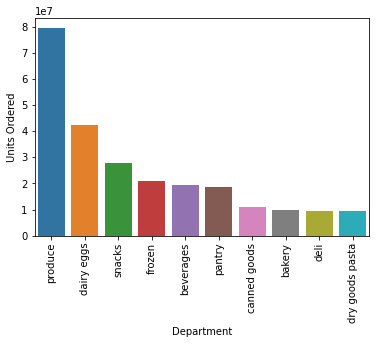

In [14]:
x = sns.barplot(data = total_orders.groupby('department')['add_to_cart_order'].sum().sort_values(ascending = False).reset_index()[0:10], x = 'department', y = 'add_to_cart_order')
x.set_xticklabels(x.get_xticklabels(), rotation = 90)
x.set(xlabel = 'Department', ylabel = 'Units Ordered')


[Text(0.5, 0, 'Department'), Text(0, 0.5, 'Department Share')]

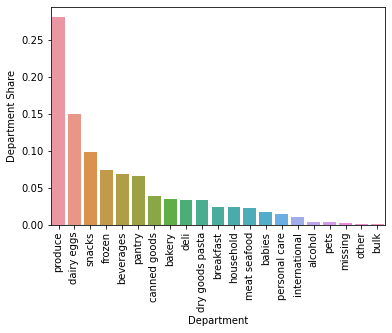

In [15]:
department_share = total_orders.groupby('department')['add_to_cart_order'].sum().reset_index()
department_share['department_share'] = department_share['add_to_cart_order']
department_share['department_share'] = department_share['department_share'].apply(lambda x: x / department_share['add_to_cart_order'].sum())

x = sns.barplot(data = department_share.sort_values(by = 'department_share',ascending = False), x = 'department', y = 'department_share')
x.set_xticklabels(x.get_xticklabels(), rotation = 90)
x.set(xlabel = 'Department', ylabel = 'Department Share')

In [16]:
total_orders.department.nunique()


21

[Text(0.5, 0, 'Aisle'), Text(0, 0.5, 'Units Ordered')]

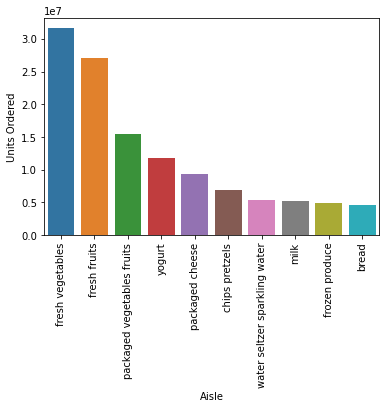

In [17]:
x = sns.barplot(data = total_orders.groupby('aisle')['add_to_cart_order'].sum().sort_values(ascending = False).reset_index()[0:10], x = 'aisle', y = 'add_to_cart_order')
x.set_xticklabels(x.get_xticklabels(), rotation = 90)
x.set(xlabel = 'Aisle', ylabel = 'Units Ordered')


[Text(0.5, 0, 'Aisle'), Text(0, 0.5, 'Aisle Share')]

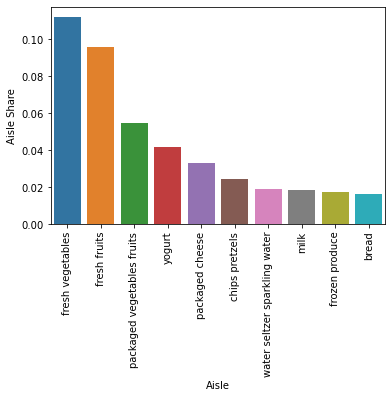

In [18]:
aisle_share = total_orders.groupby('aisle')['add_to_cart_order'].sum().reset_index()
aisle_share['aisle_share'] = aisle_share['add_to_cart_order']
aisle_share['aisle_share'] = aisle_share['aisle_share'].apply(lambda x: x / aisle_share['add_to_cart_order'].sum())

x = sns.barplot(data = aisle_share.sort_values(by = 'aisle_share',ascending = False)[0:10], x = 'aisle', y = 'aisle_share')
x.set_xticklabels(x.get_xticklabels(), rotation = 90)
x.set(xlabel = 'Aisle', ylabel = 'Aisle Share')

[Text(0.5, 0, 'Product Name'), Text(0, 0.5, 'Unit Share')]

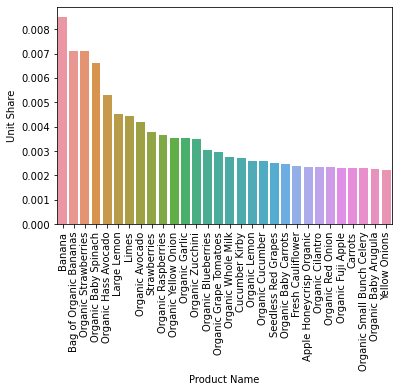

In [19]:
product_share = total_orders.groupby('product_name')['add_to_cart_order'].sum().reset_index()
product_share['product_share'] = product_share['add_to_cart_order']
product_share['product_share'] = product_share['product_share'].apply(lambda x: x / product_share['add_to_cart_order'].sum())

x = sns.barplot(data = product_share.sort_values(by = 'product_share',ascending = False)[0:30], x = 'product_name', y = 'product_share')
x.set_xticklabels(x.get_xticklabels(), rotation = 90)
x.set(xlabel = 'Product Name', ylabel = 'Unit Share')

In [20]:
pd.set_option('display.min_rows',10000)
total_orders.groupby('product_name')['add_to_cart_order'].sum().sort_values(ascending = False)[0:1000]


product_name
Banana                                                       2405664
Bag of Organic Bananas                                       2007396
Organic Strawberries                                         2005999
Organic Baby Spinach                                         1870623
Organic Hass Avocado                                         1497887
Large Lemon                                                  1279007
Limes                                                        1261016
Organic Avocado                                              1187054
Strawberries                                                 1065577
Organic Raspberries                                          1031044
Organic Yellow Onion                                         1004141
Organic Garlic                                               1001654
Organic Zucchini                                              986367
Organic Blueberries                                           862073
Organic Grape Tomatoe

In [21]:
total_orders.groupby('user_id')['order_id'].nunique().describe()


count    206209.000000
mean         16.226658
std          16.662238
min           3.000000
25%           6.000000
50%          10.000000
75%          20.000000
max         100.000000
Name: order_id, dtype: float64

C:\Users\saira\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Orders/User')]

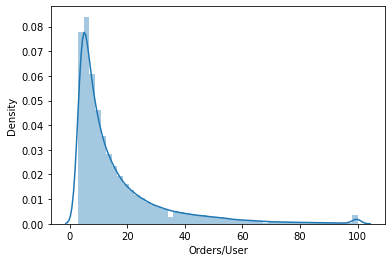

In [22]:
x = sns.distplot(total_orders.groupby('user_id')['order_id'].nunique())
x.set(xlabel = 'Orders/User')


In [23]:
total_orders.groupby('user_id')['add_to_cart_order'].sum().describe()


count    206209.000000
mean       1372.342643
std        2489.390476
min           3.000000
25%         203.000000
50%         568.000000
75%        1483.000000
max      138990.000000
Name: add_to_cart_order, dtype: float64

C:\Users\saira\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Units Ordered/User')]

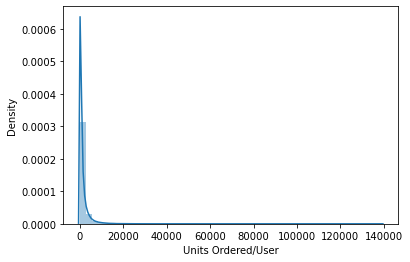

In [24]:
x = sns.distplot(total_orders.groupby('user_id')['add_to_cart_order'].sum())
x.set(xlabel = 'Units Ordered/User')


In [25]:
total_orders.groupby('order_id')['add_to_cart_order'].sum().describe()


count    3.346083e+06
mean     8.457334e+01
std      1.355298e+02
min      1.000000e+00
25%      1.500000e+01
50%      3.600000e+01
75%      1.050000e+02
max      1.058500e+04
Name: add_to_cart_order, dtype: float64

C:\Users\saira\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Units/Order')]

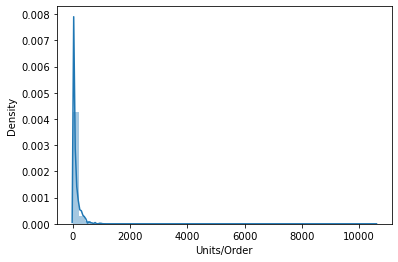

In [26]:
x = sns.distplot(total_orders.groupby('order_id')['add_to_cart_order'].sum())
x.set(xlabel = 'Units/Order')


C:\Users\saira\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Units/Order')]

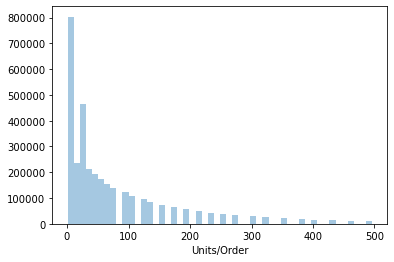

In [27]:
order_size = total_orders.groupby('order_id')['add_to_cart_order'].sum().reset_index()

x = sns.distplot(order_size[order_size['add_to_cart_order'] < 500]['add_to_cart_order'], kde = False)
x.set(xlabel = 'Units/Order')


In [28]:
orders.groupby('user_id')['days_since_prior_order'].mean().describe()


count    206209.000000
mean         15.448686
std           6.915575
min           0.000000
25%           9.814815
50%          15.000000
75%          20.625000
max          30.000000
Name: days_since_prior_order, dtype: float64

[Text(0.5, 0, 'Average Days Between Orders By User')]

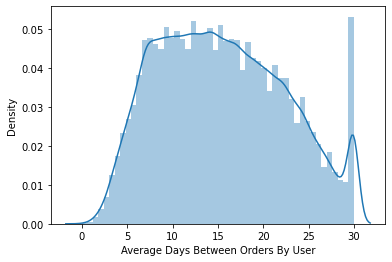

In [29]:
x = sns.distplot(orders.groupby('user_id')['days_since_prior_order'].mean())
x.set(xlabel = 'Average Days Between Orders By User')


<AxesSubplot:>

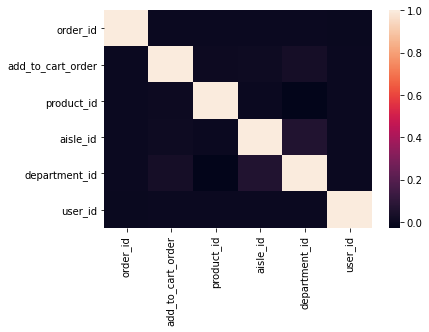

In [30]:
corr = total_orders.corr()
sns.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns)
